# Clean & Analyze Social Media

## Introduction

Social media has become a ubiquitous part of modern life, with platforms such as Instagram, Twitter, and Facebook serving as essential communication channels. Social media data sets are vast and complex, making analysis a challenging task for businesses and researchers alike. In this project, we explore a simulated social media, for example Tweets, data set to understand trends in likes across different categories.

## Prerequisites

To follow along with this project, we should have a basic understanding of Python programming and data analysis concepts. In addition, you we want to use the following packages in your Python environment:

- pandas
- Matplotlib
- numpy
- seaborn
- random

## Project Scope

The objective of this project is to analyze tweets (or other social media data) and gain insights into user engagement. We will explore the data set using visualization techniques to understand the distribution of likes across different categories. Finally, we will analyze the data to draw conclusions about the most popular categories and the overall engagement on the platform.

## Step 1: Importing Required Libraries

As the name suggests, the first step is to import all the necessary libraries that will be used in the project. In this case, we need pandas, numpy, matplotlib, seaborn, and random libraries.

Pandas is a library used for data manipulation and analysis. Numpy is a library used for numerical computations. Matplotlib is a library used for data visualization. Seaborn is a library used for statistical data visualization. Random is a library used to generate random numbers.

In [2]:
# your code here

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [14]:
# Generate Random Data
random.seed(42)
np.random.seed(42)

users = ['user' + str(i) for i in range(1, 101)]
tweets = [
    'I love healthy food', 'Family is everything', 'Tech innovations are amazing',
    'Fitness is my passion', 'Beauty routines are important', 'Food is life'
]
categories = ['health', 'family', 'food', 'tech', 'fitness', 'beauty']

data = {
    'Date': pd.date_range(start='1/1/2023', periods=1000, freq='H'),
    'User': np.random.choice(users, 1000),
    'Tweet': np.random.choice(tweets, 1000)
}

tweets_data = pd.DataFrame(data)

In [15]:
# Clean Text Data 
def clean_tweet(tweet):
    tweet = tweet.replace('http', '').replace('@', '').replace('#', '').replace('\n', '').lower()
    tweet = ''.join(e for e in tweet if e.isalnum() or e.isspace())
    return tweet

tweets_data['Cleaned_Tweet'] = tweets_data['Tweet'].apply(clean_tweet)

In [22]:
# Categorize Tweets
def categorize_tweet(tweet):
    for category in categories:
        if category in tweet:
            return category
    return 'other'

tweets_data['Category'] = tweets_data['Cleaned_Tweet'].apply(categorize_tweet)
category_counts = tweets_data['Category'].value_counts()

In [17]:
# Sentiment Analysis (Simple Example)
positive_words = ['love', 'amazing', 'passion', 'life']
negative_words = ['hate', 'bad', 'sad', 'worst']

def get_sentiment(tweet):
    if any(word in tweet for word in positive_words):
        return 'Positive'
    elif any(word in tweet for word in negative_words):
        return 'Negative'
    else:
        return 'Neutral'

tweets_data['Sentiment'] = tweets_data['Cleaned_Tweet'].apply(get_sentiment)

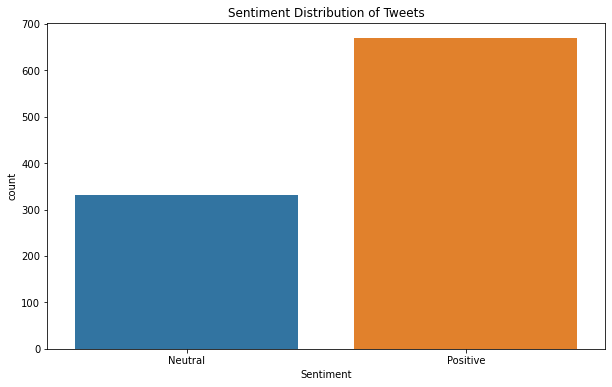

In [18]:
# Visualization: Distribution of Sentiments
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=tweets_data)
plt.title('Sentiment Distribution of Tweets')
plt.show()

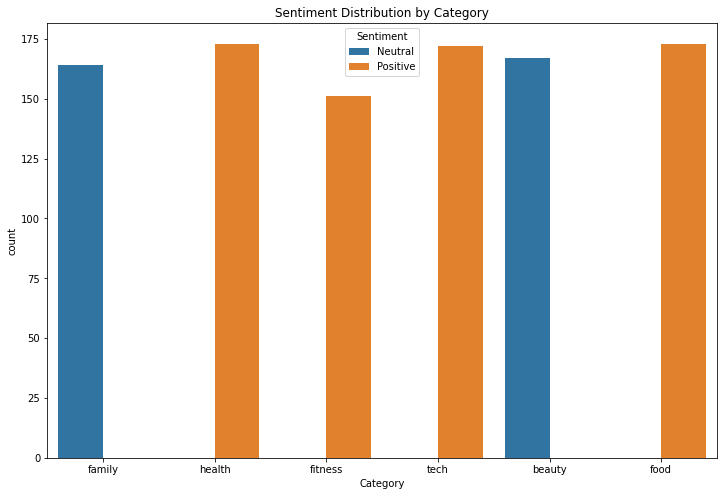

In [19]:
# Visualization: Sentiments by Category
plt.figure(figsize=(12, 8))
sns.countplot(x='Category', hue='Sentiment', data=tweets_data)
plt.title('Sentiment Distribution by Category')
plt.show()

Most popular category: food with 173 tweets


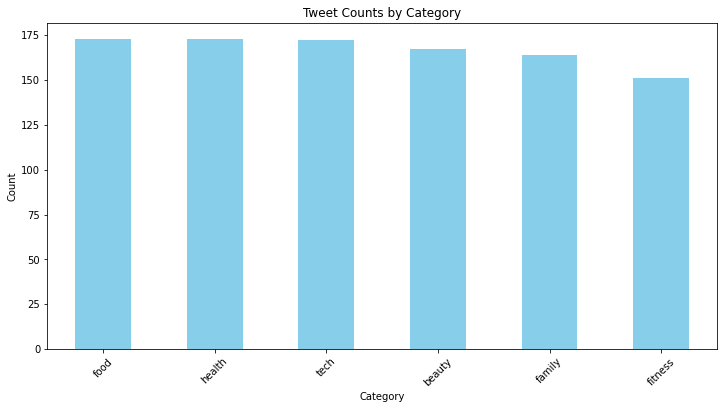

In [23]:

# Most Popular Category
popular_category = tweets_data['Category'].value_counts().idxmax()
counts = category_counts.max()
print(f"Most popular category: {popular_category} with {counts} tweets")

# Bar plot of Tweet Counts by Category
plt.figure(figsize=(12, 6))
category_counts = tweets_data['Category'].value_counts()
category_counts.plot(kind='bar', color='skyblue')
plt.title('Tweet Counts by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [24]:
# Recommendations
recommendations = {
    'health': 'Focus on positive messaging around wellness and fitness routines.',
    'family': 'Share uplifting stories and tips for family bonding activities.',
    'food': 'Highlight new recipes and healthy eating habits to engage the audience.',
    'tech': 'Showcase the latest innovations and tech trends.',
    'fitness': 'Promote fitness challenges and success stories.',
    'beauty': 'Share beauty tips and skincare routines.'
}

for category, recommendation in recommendations.items():
    print(f"For {category}, recommendation: {recommendation}")

For health, recommendation: Focus on positive messaging around wellness and fitness routines.
For family, recommendation: Share uplifting stories and tips for family bonding activities.
For food, recommendation: Highlight new recipes and healthy eating habits to engage the audience.
For tech, recommendation: Showcase the latest innovations and tech trends.
For fitness, recommendation: Promote fitness challenges and success stories.
For beauty, recommendation: Share beauty tips and skincare routines.
